In [111]:
%reset

# Importing

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

c:\anaconda\envs\machine_learning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda\envs\machine_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\anaconda\envs\machine_learning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import umap # dimensionality reduction
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import hdbscan
from deep_translator import GoogleTranslator
import mysql.connector as mysql

In [21]:
def data_extractor():
    try:
        conn = mysql.connect(host='localhost', database='laravel_test', user='root', password='root')
    except:
        print("error connecting to local db server")
    cursor = conn.cursor()
    #obtaining records
    q1="SELECT * FROM posts where source_id=1"
    cursor.execute(q1)
    result = cursor.fetchall()
    #obtaining column names
    q2="SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'posts' ORDER BY ORDINAL_POSITION;"
    cursor.execute(q2)
    col_names = cursor.fetchall()
    fin_col_names=[]
    for tup in col_names:
        fin_col_names.append(tup[0])

    return pd.DataFrame(result,columns=fin_col_names)

# Preparing Dataset

In [3]:
# from df_cons import extractor
from df_cons_v1 import extractor

In [4]:
de=extractor()
type(de),de

(tuple,
 (Empty DataFrame
  Columns: [post_id, title, agency_id, post_url, category_id, image_url, contents, published_date_and_time, author_name, main_category_id, sub_category_id, media_type, slug, urgency, source_id, status, created_at, updated_at, deleted_at, tweet_created_at, tweet_text, tweet_id, vdo_title, vdo_description, vdo_published_at, vdo_thumbnail, vdo_url, active_id, trending_count]
  Index: []
  
  [0 rows x 29 columns],
  '################hello##########'))

In [38]:
dataset=de.main()

AttributeError: 'DataFrame' object has no attribute 'main'

In [24]:
dataset.head(5)

,post_id,title,agency_id,post_url,category_id,image_url,contents,published_date_and_time,author_name,main_category_id,...,tweet_created_at,tweet_text,tweet_id,vdo_title,vdo_description,vdo_published_at,vdo_thumbnail,vdo_url,active_id,trending_count
0,21,الصحة تطلب من قيادييها تخصيص يوم في الأسبوع لت...,12,http://alwatan.kuwait.tt/articledetails.aspx?i...,1,http://watanmedia.seyasi.com/resources/media/i...,\n أصدر وكي...,2022-11-01T00:00:00,alwatan,1,...,None,None,None,None,None,None,None,None,None,None
1,24,السفير الكوري: رؤية 2035 ستقودنا إلى «كويت ذكية»,1,https://www.alqabas.com/article/5897771,1,https://dqnxlhsgmg1ih.cloudfront.net/storage/a...,مي السكري -أكد سفير جمهورية كوريا لدى الكويت ت...,2022-10-31T18:29:02.465000+00:00,alqabas,1,...,None,None,None,None,None,None,None,None,None,None
2,25,السفير القبرصي: اهتمام كويتي بتملّك العقارات ل...,1,https://www.alqabas.com/article/5897770,1,https://dqnxlhsgmg1ih.cloudfront.net/storage/a...,مي السكري -دعا السفير القبرص لدى البلاد، مايكل...,2022-10-31T18:26:42.598000+00:00,alqabas,1,...,None,None,None,None,None,None,None,None,None,None
3,26,شاركت الامانة العامة للمجلس الاعلى للتخطيط وال...,205,https://www.scpd.gov.kw/Default5_news.aspx,4,https://www.scpd.gov.kw/NewsOthers/original_so...,\r\n ...,2022-10-26T00:00:00,General Secretariat of Supreme Council for Pla...,2,...,None,None,None,None,None,None,None,None,None,None
4,27,\r\n توضيح ...,260,http://www.pifss.gov.kw/sites/Ar/Pages/NewsDet...,22,None,\n\n\n\n\n\nالكويت 25 أكتوبر 2022 – توضيحًا لل...,2022-10-25T00:00:00,Public Institution for Social Security in Kuwait,2,...,None,None,None,None,None,None,None,None,None,None


In [7]:
dataset.tail(5)

,post_id,title,agency_id,post_url,category_id,image_url,contents,published_date_and_time,author_name,main_category_id,...,tweet_created_at,tweet_text,tweet_id,vdo_title,vdo_description,vdo_published_at,vdo_thumbnail,vdo_url,active_id,trending_count
20939,20972,محاضرة مرورية توعوية في كلية التربية بجامعة ال...,280,https://twitter.com/traffic_kwt,3,http://pbs.twimg.com/media/Fgfi3TaXwAEkqsS.jpg,None,2022-11-01T16:10:03,None,2,...,2022-11-01 22:18:54,محاضرة مرورية توعوية في كلية التربية بجامعة ال...,https://twitter.com/twitter/statuses/158748685...,None,None,NaT,None,None,None,None
20940,20973,د. يوسف الجارد: 94 ألف طلب إسكاني مُعلّق تعكس ...,155,http://khalejianews.com/posts/4540,1,https://khalejianews.com/storage/5610/63614754...,نظّم الشاعر والأديب ماجد الجارد ندوة «آخر المس...,2022-11-01T16:21:49.821168,khalejinews,1,...,NaT,None,None,None,None,NaT,None,None,None,None
20941,20974,حرب بيانات بين «الجهاز المركزي» وجمعية المحامين,155,http://khalejianews.com/posts/4536,1,https://khalejianews.com/storage/5606/63611c73...,حرب بيانات استعرت بين الجهاز المركزي لمعالجة أ...,2022-11-01T14:09:40.401917,khalejinews,1,...,NaT,None,None,None,None,NaT,None,None,None,None
20942,20975,سفير الكويت في ألمانيا يؤكد سعي الكويت لانتهاج...,155,http://khalejianews.com/posts/4537,1,https://khalejianews.com/storage/5607/636122d4...,برلين - 1 - 11 (كونا) -- اكد سفير دولة الكويت ...,2022-11-01T14:09:42.343141,khalejinews,1,...,NaT,None,None,None,None,NaT,None,None,None,None
20943,20976,خلال لقائه ممثل سمو رئيس مجلس الوزراء وزير الد...,155,http://khalejianews.com/posts/4539,1,https://khalejianews.com/storage/5609/63612e94...,العقبة (الاردن) - 1 - 11 (كونا) -- اكد رئيس ال...,2022-11-01T15:09:44.880124,khalejinews,1,...,NaT,None,None,None,None,NaT,None,None,None,None


SyntaxError: invalid syntax (3348577368.py, line 1)

In [56]:
dataset.head(5)

,post_id,title,agency_id,post_url,category_id,image_url,contents,published_date_and_time,author_name,main_category_id,...,tweet_created_at,tweet_text,tweet_id,vdo_title,vdo_description,vdo_published_at,vdo_thumbnail,vdo_url,active_id,trending_count
0,1,نا ب ر يس مجلس ال مة محمد المطير يفتتح جلسة ال...,1,https://twitter.com/alqabas,9,NaN,NaN,2022-11-01T06:10:04,NaN,1,...,2022-11-01 11:38:31,نا ب ر يس مجلس ال مة محمد المطير يفتتح جلسة ال...,https://twitter.com/twitter/statuses/158732569...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,د. عبدالله النفيسي: عثمان عبدالملك سكن في شقة,1,https://www.youtube.com/playlist?list=PLsmKD0j...,8,NaN,NaN,2022-11-01T06:10:04,NaN,1,...,NaN,NaN,NaN,د. عبدالله النفيسي: عثمان عبدالملك سكن في شقة,#القبس #مع_النفيسي #عثمان_عبدالملك #عبدالله_ال...,2022-11-01 00:54:40,https://i.ytimg.com/vi/569BsUkR3xc/default.jpg,https://www.youtube.com/embed/569BsUkR3xc,NaN,NaN
2,3,طيران الجزيرة تزيد رباحها لى 20 7 مليون دينار ...,1,https://twitter.com/alqabas,9,NaN,NaN,2022-11-01T06:10:04,NaN,1,...,2022-11-01 03:14:15,طيران الجزيرة تزيد رباحها لى 20 7 مليون دينار ...,https://twitter.com/twitter/statuses/158719879...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ذاكرة الأندلس.. فعالية تفتح جرحاً وتوثق تاريخا...,1,https://www.youtube.com/playlist?list=PLsmKD0j...,8,NaN,NaN,2022-11-01T06:10:04,NaN,1,...,NaN,NaN,NaN,ذاكرة الأندلس.. فعالية تفتح جرحاً وتوثق تاريخا...,إشترك الآن في قناة القبس الرسمية\nhttps://www....,2022-10-31 23:12:03,https://i.ytimg.com/vi/lrb2gjrp-e0/default.jpg,https://www.youtube.com/embed/lrb2gjrp-e0,NaN,NaN
4,5,القضا ينتصر لكرامة ال نسان الكلبجات ممنوعة داخ...,1,https://twitter.com/alqabas,9,NaN,NaN,2022-11-01T06:10:04,NaN,1,...,2022-11-01 02:32:50,القضا ينتصر لكرامة ال نسان الكلبجات ممنوعة داخ...,https://twitter.com/twitter/statuses/158718837...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dataset["category"].unique()

array(['local news', nan], dtype=object)

In [24]:
dataset.dropna(axis=0,inplace=True)
# removing all special characters 

exp='[\u0627-\u064aA-Za-z]+' #re to get arabic and english , i had eliminated numbers and special characters because they dont have much influence 
dataset["contents"]=dataset['contents'].apply(lambda data : " ".join(re.findall(exp,data)))
dataset["category"]=dataset["category"].apply(lambda data : " ".join(re.findall(exp,data)))
dataset["title"]=dataset["title"].apply(lambda data : " ".join(re.findall(exp,data)))
empty_str_contents=dataset.loc[dataset["contents"]==r""].index
empty_str_title=dataset.loc[dataset["title"]==r""].index
empty_str_category=dataset.loc[dataset["category"]==""].index
dataset.drop(list(empty_str_contents),axis=0,inplace=True)

In [25]:
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    # text = text.lower()
    # text = text.replace('x', '')
    return text

dataset["title"]=dataset["title"].apply(cleanText)
dataset["contents"]=dataset["contents"].apply(cleanText)
dataset["category"]=dataset["category"].apply(cleanText)

In [26]:
dataset.drop('author_name',axis=1,inplace=True)

In [27]:
dataset=dataset[["title","contents","category"]]
dataset.reset_index(inplace=True)
data=dataset["title"]+dataset["contents"]
data=data.to_list()
dataset

,index,title,contents,category
0,3,سمو نا ب ال مير وولي العهد يهن الملك تشارلز ال...,كونا بعث سمو نا ب ال مير وولي العهد الشيخ مشعل...,local news
1,4,سمو ال مير يهن تشارلز الثالث بمناسبة عتلا ه ال...,كونا بعث سمو مير البلاد الشيخ نواف ال حمد ببرق...,local news
2,5,مستشفى الطب الطبيعي والت هيل يحتفل باليوم العا...,احتفل مستشفى الطب الطبيعي والت هيل باليوم العا...,local news
3,6,الهلال ال حمر تبد حملة جمع تبرعات لمتضرري الصو...,بد ت جمعية الهلال ال حمر اليوم السبت حملة جمع ...,local news
4,7,السفارة البريطانية رفع العلم من ظهر اليوم حتى ...,مي السكري علنت السفارة البريطانية لدى البلاد ن...,local news
...,...,...,...,...
2362,4995,المجلس البلدي يختار عضا لجانه,اختار المجلس البلدي اليوم ال ربعا في جلسته غير...,local news
2363,4996,سمو نا ب ال مير وولي العهد يتلقى اتصالا من سلط...,تلقى سمو نا ب ال م ر وولي الع د الش خ نواف ال ...,local news
2364,4997,القوى العاملة مهلة ثلاثة شهر ل صحاب العربات ال...,مهلت الهي ة العامة للقوى العاملة صحاب المركبات...,local news
2365,4998,د عبدالمحسن الحويلة التعليم الخاص يلتقي صحاب ا...,التقت وزارة التربية ممثلة في قطاع التعليم الخا...,local news


In [28]:
dataset.drop(["index","category"],axis=1,inplace=True)

In [29]:
dataset

,title,contents
0,سمو نا ب ال مير وولي العهد يهن الملك تشارلز ال...,كونا بعث سمو نا ب ال مير وولي العهد الشيخ مشعل...
1,سمو ال مير يهن تشارلز الثالث بمناسبة عتلا ه ال...,كونا بعث سمو مير البلاد الشيخ نواف ال حمد ببرق...
2,مستشفى الطب الطبيعي والت هيل يحتفل باليوم العا...,احتفل مستشفى الطب الطبيعي والت هيل باليوم العا...
3,الهلال ال حمر تبد حملة جمع تبرعات لمتضرري الصو...,بد ت جمعية الهلال ال حمر اليوم السبت حملة جمع ...
4,السفارة البريطانية رفع العلم من ظهر اليوم حتى ...,مي السكري علنت السفارة البريطانية لدى البلاد ن...
...,...,...
2362,المجلس البلدي يختار عضا لجانه,اختار المجلس البلدي اليوم ال ربعا في جلسته غير...
2363,سمو نا ب ال مير وولي العهد يتلقى اتصالا من سلط...,تلقى سمو نا ب ال م ر وولي الع د الش خ نواف ال ...
2364,القوى العاملة مهلة ثلاثة شهر ل صحاب العربات ال...,مهلت الهي ة العامة للقوى العاملة صحاب المركبات...
2365,د عبدالمحسن الحويلة التعليم الخاص يلتقي صحاب ا...,التقت وزارة التربية ممثلة في قطاع التعليم الخا...


In [31]:
data=dataset["title"]+dataset["contents"]
data=data.to_list()

In [33]:
len(data)

2367

# Experiment

In [18]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so need of saving this model with our data
model = hub.load(module_url)

In [ ]:
embedding_gen = model(data) 

In [ ]:
similarity = cosine_similarity(embeddings)
print(similarity)

In [ ]:
embedding_gen.shape

In [ ]:
embedding_gen[1] #vector of 1st record

In [ ]:
#lets train the model with only one record and compare the results 

In [ ]:
temp_data=data[0]
temp_embedding_gen = model([temp_data]) 

In [ ]:
temp_embedding_gen,embedding_gen[0] #same

In [ ]:
#lets create a new model and check the results
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model1 = hub.load(module_url)
temp_data1=data[0]
temp_embedding_gen1 = model1([temp_data1]) 

In [ ]:
temp_embedding_gen1,embedding_gen[0]

# Observation :<br>
"https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so no need of saving this model with our data

# Vectorizing 

In [34]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so need of saving this model with our data
model = hub.load(module_url)

In [35]:
embedding_gen = model(data) 

In [36]:
embedding_gen.shape

TensorShape([2367, 512])

# Dimensionality Reduction

As seen above, all of our sentence embeddings have high dimensionality (>500 features each). A manifestation of the Curse of Dimensionality is that distance measures, such as Euclidean and Manhattan, needed for clustering become meaningless at such high dimensions (see for example “On the Surprising Behavior of Distance Metrics in High Dimensional Space” by Aggarwal et al for more details)

### UMAP dimensionality reduction

In [37]:
umap_embeddings = (umap.UMAP(n_neighbors=10, n_components=20, metric='cosine', 
                                random_state=24).fit_transform(embedding_gen))

As like PCA we can't find the information retained during the process using explained varience ratio  <br>
Reference : https://github.com/lmcinnes/umap/issues/122

In [38]:
print(type(umap_embeddings),'\n',umap_embeddings.shape,'\n',umap_embeddings)

<class 'numpy.ndarray'> 
 (2367, 20) 
 [[11.5372095  4.3211484  6.3942842 ...  5.2800546  8.13735    3.21148  ]
 [11.449471   4.351949   6.336443  ...  5.2598715  8.125133   3.210256 ]
 [11.369151   4.6538963  4.6798186 ...  5.293186   8.007342   3.181463 ]
 ...
 [ 7.8660035  8.055415   1.731582  ...  4.684535   8.122692   3.601575 ]
 [ 3.2206018  9.486367   2.192006  ...  4.4646344  8.336443   3.5688682]
 [10.981469   4.8999443  4.426204  ...  5.1785035  8.0259905  3.1494572]]


# DBScan Clustering



### parameters for tuning:<br>
 * epslon and min samples
### problems :<br>
 * how to take points in a particular cluster
 * how to find most closest point to our input data point

In [137]:

model=DBSCAN(eps=0.02,min_samples=3)

In [138]:
model.fit(np.array(embedding_gen))

DBSCAN(eps=0.02, min_samples=3)

In [141]:
print(type(model.labels_),np.unique(model.labels_),len(model.labels_))
for i in np.unique(model.labels_):
    # print(i)
    print(i,"appeared",np.count_nonzero(model.labels_ == i),"times")

<class 'numpy.ndarray'> [-1] 2367
-1 appeared 2367 times


In [140]:
for i in np.unique(model.labels_):
    # print(i)
    print(i,"appeared",np.count_nonzero(model.labels_ == i),"times")

-1 appeared 2367 times


# K means Clustering

In [163]:
# from cv2 imp/ort kmeans
interia=[]  #SSE -->sum of squared distance 
clusters=500
for cluster in range(3,clusters,5):
    model=KMeans(cluster)
    model.fit(np.array(embedding_gen))
    interia.append(model.inertia_)


KeyboardInterrupt: 

Text(0, 0.5, 'interia')

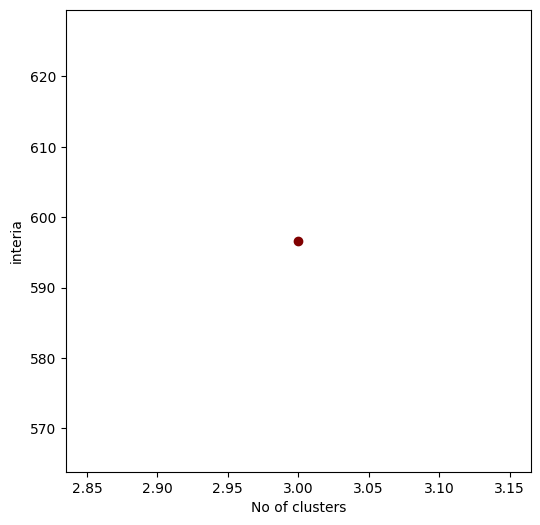

In [162]:
# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(3,500,5), interia, '-o', c = 'maroon')
plt.xlabel('No of clusters')
plt.ylabel('interia')

In [150]:
np.array(embedding_gen)[1][1]

-0.036822043

# HDBscan

 it is preferable to use an algorithm that does not require specifying the number of clusters upfront and can also tolerate noisy data. Density-based algorithms are a good option here as they do not require specifying the number of clusters and are indifferent to cluster shape. Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN) has become popular since it has fewer and more intuitive hyperparameters than DBSCAN and is robust to variable-density clusters.

In [39]:
clusters = hdbscan.HDBSCAN(min_cluster_size = 3,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)
# hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#                 gen_min_span_tree=False, leaf_size=40,metric='euclidean',
#                 min_cluster_size=5, min_samples=None, p=None)
print(clusters.labels_,len(clusters.labels_))
print(np.unique(clusters.labels_),'\n',len(np.unique(clusters.labels_)))

[ 3  3  3 ...  3 16  3] 2367
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 
 21


In [ ]:
# By removing the category column no.of clusters reduced to 21

In [167]:
cluster=[]
for idx in range(len(clusters.labels_)):
    if clusters.labels_[idx]==10: #taking dataponits of 10th cluster
        cluster.append(idx)

In [ ]:
news_cluster=[]
for dp in cluster:
    news_cluster.append(GoogleTranslator(source='auto', target='en').translate(data[dp][:200])) #limiting to 200 --> for easy translation
news_cluster

In [123]:
news_cluster=[]
for dp in cluster:
    news_cluster.append(GoogleTranslator(source='auto', target='en').translate(data[dp][:200])) #limiting to 200 --> for easy translation
news_cluster

['France awards Sheikha Intisar Al-Sabah, the Legion of Honor, with the rank of Knight',
 'Kulthum Hussein Awad wins the presidency of the Arab Union for specialized women',
 'Kulthum Awad wins the presidency of the Arab Union for the specialized women',
 'The progressive movement rejects a map of restructuring the public sector, which is biased against the popular classes in favor of the big capitalists',
 'Kuwait is the world leader in terms of order and safety in schools',
 'The university president issues a decision to amend the distance education regulation',
 'The Lawyers Association: Excluding nationality workers from the jurisdiction of the judiciary needs urgent legislative intervention',
 'The Martyr’s Office launches a competition to design a model symbolizing national unity and the memorialization of martyrs',
 'Teachers: The necessity of integrated education supported by the blended education to ensure quality and continuity',
 'The integrity of Kuwait’s efforts against co

In [166]:
test_labels, strengths=hdbscan.approximate_predict(clusters,umap_embeddings[51].reshape(1,20)) #for feeding into this we need to reshape the data with 1row and 20 cols
test_labels,strengths # study about strenths
#https://hdbscan.readthedocs.io/en/latest/prediction_tutorial.html

(array([10]), array([1.]))

# Evaluation metrics for clustering

https://www.youtube.com/watch?v=psQjwfFzLrk&t=69

# Things to study  <br>
* universal sentence encoder
* UMAP
* HDBSCAN

# Informations
hdbscan-0.8.28